In [66]:
from fastai.vision.all import *
from fastbook import *

In [67]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

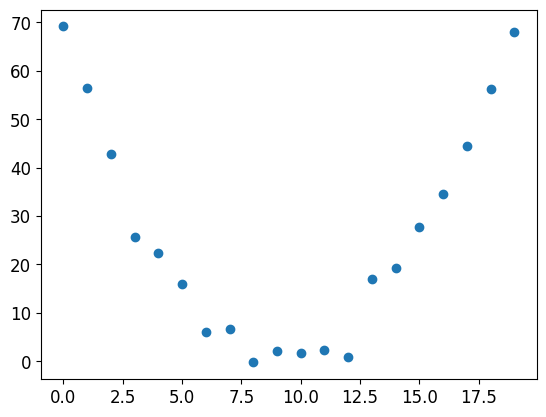

In [68]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed)

In [69]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [70]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [71]:
params = torch.randn(3).requires_grad_()

In [72]:
orig_params = params.clone()

In [73]:
preds = f(time, params)

In [74]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

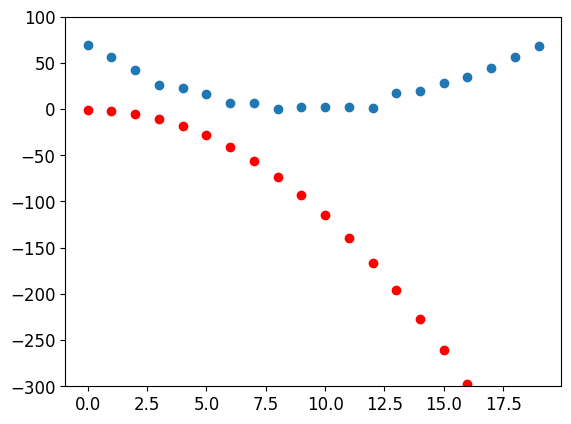

In [75]:
show_preds(preds)

In [76]:
loss = mse(preds, speed)
loss

tensor(48413.0469, grad_fn=<MeanBackward0>)

In [77]:
loss.backward()
params.grad

tensor([-73315.5781,  -4693.1616,   -338.1804])

In [78]:
params.grad * 1e-5

tensor([-0.7332, -0.0469, -0.0034])

In [79]:
params

tensor([-1.1929,  0.5960, -1.4723], requires_grad=True)

In [80]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [81]:
preds = f(time,params)
mse(preds, speed)

tensor(9687.1504, grad_fn=<MeanBackward0>)

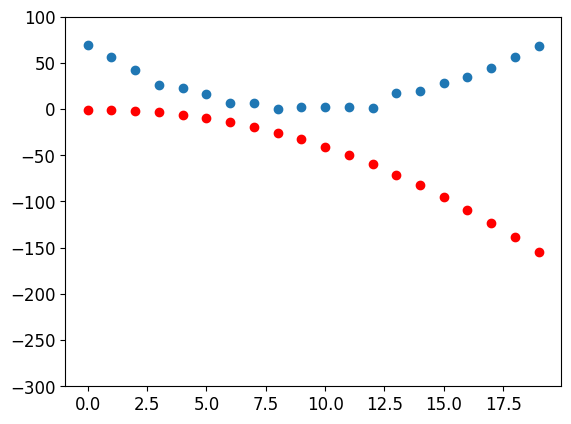

In [82]:
show_preds(preds)

In [83]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [84]:
for i in range(10): apply_step(params)

9687.150390625
2359.0234375
972.3146362304688
709.9036865234375
660.2442626953125
650.843994140625
649.0618896484375
648.7214965820312
648.6536865234375
648.6376953125


In [85]:
params = orig_params.detach().requires_grad_()

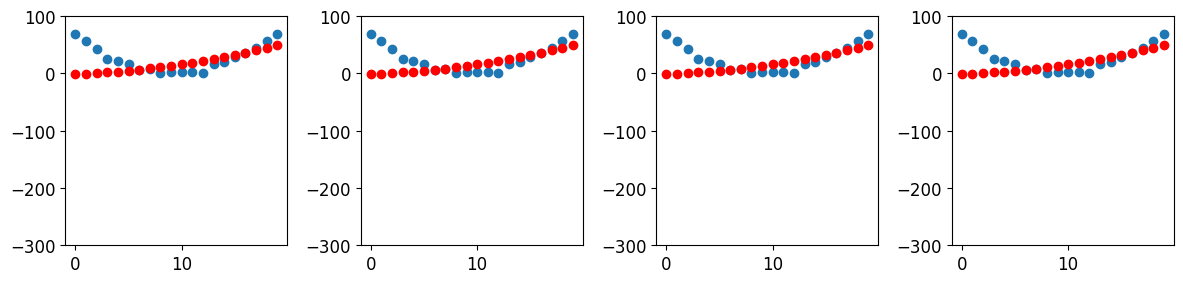

In [90]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()